In [12]:
# Dependencies
import pandas as pd
api_key='65e1815f7f3e5fece438b25519042fbaffdd59c5'
from census import Census
from us import states
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn chart style
sns.set()

# Increase the size of the charts
plt.rcParams["figure.figsize"] = [10,8]

In [2]:
def GetAttainmentData(year, gender, age, highschool, somecollege, associates, bachelors, gradorprof):
    
    # Make connection with Census
    response = Census(api_key)
    
    # Do the API call
    census_data = response.acs5.get(('NAME', highschool, somecollege, associates, bachelors, gradorprof), {'for': 'us:*'})
    
    census_data = pd.DataFrame(census_data)

    # Column Reordering
    census_data = census_data.rename(columns={year: "Year", gender: "Gender",highschool: "High School Graduate Count", 
                                              somecollege: "Some College Count", associates: "Associate Degree Count", bachelors: "Bachelor Degree Count",
                                              gradorprof: "Graduate or Professional Degree Count"})
    
    census_data["Name"] = gender + " " + age

    
    return(census_data)

In [4]:
# Get data for males & females, age groups 25-39, 40-64 and 65+
M2534_attainment_data = GetAttainmentData(2016,'Male', '25-34', 'B15001_014E', 'B15001_015E', 'B15001_016E', 'B15001_017E', 
                                          'B15001_018E')
M3544_attainment_data = GetAttainmentData(2016, 'Male', '35-44', 'B15001_022E', 'B15001_023E', 'B15001_024E', 'B15001_025E', 
                                       'B15001_026E')
M4564_attainment_data = GetAttainmentData(2016, 'Male', '45-64', 'B15001_030E', 'B15001_031E', 'B15001_032E', 'B15001_033E', 
                                       'B15001_034E')
M65_attainment_data = GetAttainmentData(2016, 'Male', '65+','B15001_038E', 'B15001_039E', 'B15001_040E', 'B15001_041E', 
                                       'B15001_042E')

F2534_attainment_data = GetAttainmentData(2016,'Female', '25-34', 'B15001_055E', 'B15001_056E', 'B15001_057E', 'B15001_058E', 
                                          'B15001_059E')
F3544_attainment_data = GetAttainmentData(2016, 'Female', '35-44', 'B15001_063E', 'B15001_064E', 'B15001_065E', 'B15001_066E', 
                                       'B15001_067E')
F4564_attainment_data = GetAttainmentData(2016, 'Female', '45-64', 'B15001_071E', 'B15001_072E', 'B15001_073E', 'B15001_074E', 
                                       'B15001_075E')
F65_attainment_data = GetAttainmentData(2016, 'Female', '65+','B15001_079E', 'B15001_080E', 'B15001_081E', 'B15001_082E', 
                                       'B15001_083E')

census_df=M2534_attainment_data.append(M3544_attainment_data, ignore_index=True)
census_df=census_df.append(M4564_attainment_data, ignore_index=True)
census_df=census_df.append(M65_attainment_data, ignore_index=True)

census_df=census_df.append(F2534_attainment_data, ignore_index=True)
census_df=census_df.append(F3544_attainment_data, ignore_index=True)
census_df=census_df.append(F4564_attainment_data, ignore_index=True)
census_df=census_df.append(F65_attainment_data, ignore_index=True)

census_df["% High School Grad"]=round(census_df['High School Graduate Count']/(census_df['High School Graduate Count']+census_df['Some College Count']+census_df['Associate Degree Count']+census_df['Bachelor Degree Count']+census_df['Graduate or Professional Degree Count'])*100, 1)
census_df["% Some College"]=round(census_df['Some College Count']/(census_df['High School Graduate Count']+census_df['Some College Count']+census_df['Associate Degree Count']+census_df['Bachelor Degree Count']+census_df['Graduate or Professional Degree Count'])*100, 1)
census_df["% Associate Degree"]=round(census_df['Associate Degree Count']/(census_df['High School Graduate Count']+census_df['Some College Count']+census_df['Associate Degree Count']+census_df['Bachelor Degree Count']+census_df['Graduate or Professional Degree Count'])*100, 1)
census_df["% Bachelor Degree"]=round(census_df['Bachelor Degree Count']/(census_df['High School Graduate Count']+census_df['Some College Count']+census_df['Associate Degree Count']+census_df['Bachelor Degree Count']+census_df['Graduate or Professional Degree Count'])*100, 1)
census_df["% Grad or Prof Degree"]=round(census_df['Graduate or Professional Degree Count']/(census_df['High School Graduate Count']+census_df['Some College Count']+census_df['Associate Degree Count']+census_df['Bachelor Degree Count']+census_df['Graduate or Professional Degree Count'])*100, 1)

census_df


,High School Graduate Count,Some College Count,Associate Degree Count,Bachelor Degree Count,Graduate or Professional Degree Count,NAME,us,Name,% High School Grad,% Some College,% Associate Degree,% Bachelor Degree,% Grad or Prof Degree
0,5991001.0,4989093.0,1712965.0,4690659.0,1822746.0,United States,1,Male 25-34,31.2,26.0,8.9,24.4,9.5
1,5432177.0,4131776.0,1585668.0,3951853.0,2361405.0,United States,1,Male 35-44,31.1,23.7,9.1,22.6,13.5
2,12001797.0,8359748.0,3113728.0,7250128.0,4736827.0,United States,1,Male 45-64,33.8,23.6,8.8,20.4,13.4
3,5698263.0,3805684.0,1079343.0,3278370.0,2972536.0,United States,1,Male 65+,33.8,22.6,6.4,19.5,17.7
4,4338344.0,4969402.0,2113819.0,5506156.0,2613696.0,United States,1,Female 25-34,22.2,25.4,10.8,28.2,13.4
5,4287860.0,4262083.0,2124645.0,4573608.0,2936772.0,United States,1,Female 35-44,23.6,23.4,11.7,25.2,16.1
6,11737362.0,9313091.0,4311663.0,7873120.0,4897273.0,United States,1,Female 45-64,30.8,24.4,11.3,20.6,12.8
7,9333607.0,4941968.0,1427893.0,3066026.0,2236612.0,United States,1,Female 65+,44.4,23.5,6.8,14.6,10.6


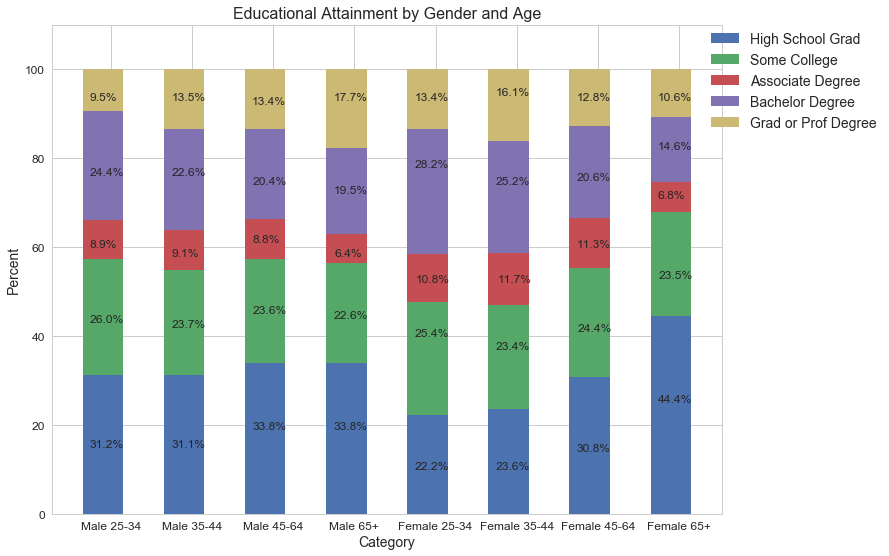

In [9]:
plt.clf()

# Set the width of the bars
width = 0.5 

# Create bar plots for each degree
p1 = plt.bar(census_df.index, census_df["% High School Grad"], width)
p2 = plt.bar(census_df.index, census_df["% Some College"], width, bottom=census_df["% High School Grad"])
p3 = plt.bar(census_df.index, census_df["% Associate Degree"], width, bottom=census_df["% High School Grad"]+census_df["% Some College"])
p4 = plt.bar(census_df.index, census_df["% Bachelor Degree"], width, bottom=census_df["% High School Grad"]+census_df["% Some College"]+census_df["% Associate Degree"])
p5 = plt.bar(census_df.index, census_df["% Grad or Prof Degree"], width, bottom=census_df["% High School Grad"]+census_df["% Some College"]+census_df["% Associate Degree"]+census_df["% Bachelor Degree"])

x_axis=range(0,8)
tick_locations = [value+0.1 for value in x_axis]
plt.xticks(tick_locations, ["Male 25-34", "Male 35-44", "Male 45-64", "Male 65+", "Female 25-34", "Female 35-44", "Female 45-64", "Female 65+"])

# Format chart items
plt.ylim(0, 110)
plt.ylabel('Percent', fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.title('Educational Attainment by Gender and Age', fontsize=16)
plt.tick_params(labelsize=12)
plt.legend(('High School Grad', 'Some College', 'Associate Degree', 'Bachelor Degree', 'Grad or Prof Degree'), bbox_to_anchor=(1.25, 1.01), prop={'size': 14})

# Add labels for values
plt.text(-0.165, 15, f"{census_df.loc[0, '% High School Grad']}%")
plt.text(-0.165, 43, f"{census_df.loc[0, '% Some College']}%")
plt.text(-0.165, 60, f"{census_df.loc[0, '% Associate Degree']}%")
plt.text(-0.165, 76, f"{census_df.loc[0, '% Bachelor Degree']}%")
plt.text(-0.165, 93, f"{census_df.loc[0, '% Grad or Prof Degree']}%")

plt.text(0.845, 15, f"{census_df.loc[1, '% High School Grad']}%")
plt.text(0.845, 42, f"{census_df.loc[1, '% Some College']}%")
plt.text(0.845, 58, f"{census_df.loc[1, '% Associate Degree']}%")
plt.text(0.845, 76, f"{census_df.loc[1, '% Bachelor Degree']}%")
plt.text(0.845, 93, f"{census_df.loc[1, '% Grad or Prof Degree']}%")


plt.text(1.84, 19, f"{census_df.loc[2, '% High School Grad']}%")
plt.text(1.85, 45, f"{census_df.loc[2, '% Some College']}%")
plt.text(1.84, 61, f"{census_df.loc[2, '% Associate Degree']}%")
plt.text(1.84, 74, f"{census_df.loc[2, '% Bachelor Degree']}%")
plt.text(1.84, 92, f"{census_df.loc[2, '% Grad or Prof Degree']}%")


plt.text(2.84, 19, f"{census_df.loc[3, '% High School Grad']}%")
plt.text(2.84, 44, f"{census_df.loc[3, '% Some College']}%")
plt.text(2.86, 58, f"{census_df.loc[3, '% Associate Degree']}%")
plt.text(2.84, 72, f"{census_df.loc[3, '% Bachelor Degree']}%")
plt.text(2.84, 93, f"{census_df.loc[3, '% Grad or Prof Degree']}%")


plt.text(3.84, 10, f"{census_df.loc[4, '% High School Grad']}%")
plt.text(3.84, 40, f"{census_df.loc[4, '% Some College']}%")
plt.text(3.86, 52, f"{census_df.loc[4, '% Associate Degree']}%")
plt.text(3.84, 78, f"{census_df.loc[4, '% Bachelor Degree']}%")
plt.text(3.84, 93, f"{census_df.loc[4, '% Grad or Prof Degree']}%")


plt.text(4.84, 10, f"{census_df.loc[5, '% High School Grad']}%")
plt.text(4.84, 37, f"{census_df.loc[5, '% Some College']}%")
plt.text(4.86, 52, f"{census_df.loc[5, '% Associate Degree']}%")
plt.text(4.84, 74, f"{census_df.loc[5, '% Bachelor Degree']}%")
plt.text(4.84, 94, f"{census_df.loc[5, '% Grad or Prof Degree']}%")


plt.text(5.84, 14, f"{census_df.loc[6, '% High School Grad']}%")
plt.text(5.85, 41, f"{census_df.loc[6, '% Some College']}%")
plt.text(5.84, 60, f"{census_df.loc[6, '% Associate Degree']}%")
plt.text(5.84, 75, f"{census_df.loc[6, '% Bachelor Degree']}%")
plt.text(5.84, 93, f"{census_df.loc[6, '% Grad or Prof Degree']}%")

plt.text(6.84, 25, f"{census_df.loc[7, '% High School Grad']}%")
plt.text(6.85, 53, f"{census_df.loc[7, '% Some College']}%")
plt.text(6.84, 71, f"{census_df.loc[7, '% Associate Degree']}%")
plt.text(6.84, 82, f"{census_df.loc[7, '% Bachelor Degree']}%")
plt.text(6.84, 93, f"{census_df.loc[7, '% Grad or Prof Degree']}%")

fig_size = plt.rcParams["figure.figsize"]

fig_size[0]=16
fig_size[1]=12

plt.rcParams["figure.figsize"] = fig_size

# Save the figure
plt.savefig("AttainmentBreakdown.png")

# Display chart
plt.show()

In [7]:
response = Census(api_key)

grad_df = response.acs5.get(('NAME','B15001_018E', 'B15001_026E', 'B15001_034E', 'B15001_042E', 'B15001_059E','B15001_067E', 'B15001_075E', 'B15001_083E'), {'for': 'state:*'})

grad_df=pd.DataFrame(grad_df)

grad_df['Male Graduate Degrees']=grad_df['B15001_018E']+grad_df['B15001_026E']+grad_df['B15001_034E']+grad_df['B15001_042E']
grad_df['Female Graduate Degrees']=grad_df['B15001_059E']+grad_df['B15001_067E']+grad_df['B15001_075E']+grad_df['B15001_083E']
grad_df['Total Graduate Degrees']=grad_df['Male Graduate Degrees']+grad_df['Female Graduate Degrees']

grad_df['% Female Grad']=round(grad_df['Female Graduate Degrees']/grad_df['Total Graduate Degrees']*100, 1)
grad_df['% Male Grad']=round(grad_df['Male Graduate Degrees']/grad_df['Total Graduate Degrees']*100, 1)


grad_df= grad_df.sort_values("% Female Grad", ascending=False)

grad_df=grad_df.drop(columns=['B15001_018E', 'B15001_026E', 'B15001_034E', 'B15001_042E', 'B15001_059E', 'B15001_067E', 'B15001_075E', 'B15001_083E'])

grad_df

,NAME,state,Male Graduate Degrees,Female Graduate Degrees,Total Graduate Degrees,% Female Grad,% Male Grad
51,Puerto Rico,72,65690.0,100075.0,165765.0,60.4,39.6
24,Mississippi,28,65805.0,88471.0,154276.0,57.3,42.7
17,Kentucky,21,122865.0,154146.0,277011.0,55.6,44.4
32,New York,36,906034.0,1131209.0,2037243.0,55.5,44.5
40,South Carolina,45,141754.0,171335.0,313089.0,54.7,45.3
10,Georgia,13,330876.0,398514.0,729390.0,54.6,45.4
45,Vermont,50,28860.0,34542.0,63402.0,54.5,45.5
18,Louisiana,22,110283.0,131788.0,242071.0,54.4,45.6
19,Maine,23,45949.0,54185.0,100134.0,54.1,45.9
0,Alabama,01,133891.0,156803.0,290694.0,53.9,46.1


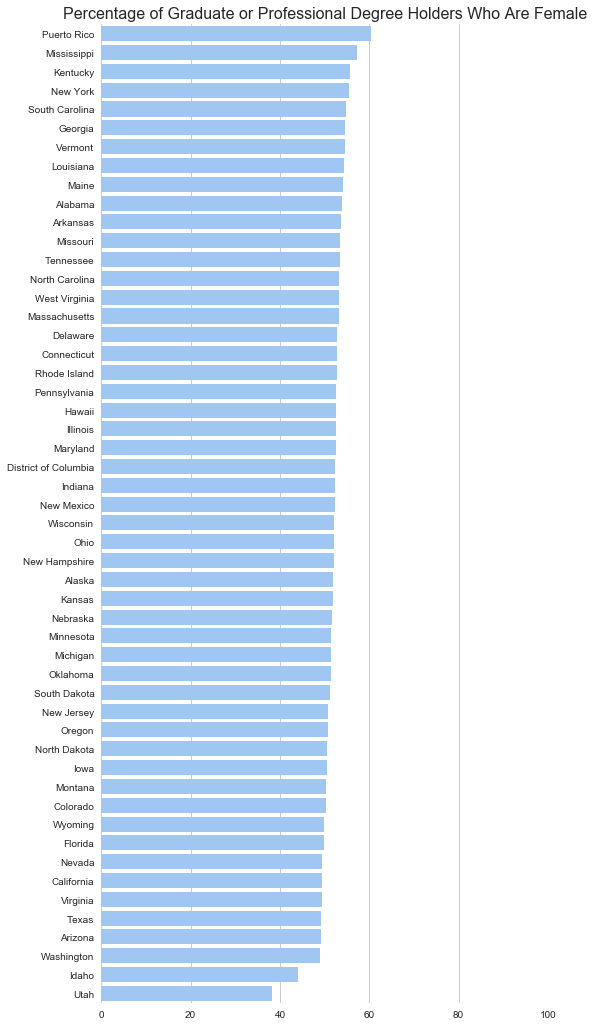

In [8]:
# Set seaborn style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 18))

# Plot the % of male engineers by state
sns.set_color_codes("pastel")
sns.barplot(x=grad_df["% Female Grad"], y=grad_df["NAME"], data=grad_df, color="b")

ax.set(xlim=(0, 100), ylabel="")
ax.set_xlabel("", fontdict={'fontsize' : 14})
plt.title('Percentage of Graduate or Professional Degree Holders Who Are Female', fontsize=16)
sns.despine(left=True, bottom=True)


In [3]:
# Mark's graphs

In [4]:
# Eric's data

In [5]:
# Eric's graphs

In [10]:
# Amanda's data

# API call
male_self_employed_data = response.acs5.get(('NAME', 'B24090_010E'), {'for': 'state:*'})
male_self_employed_pd = pd.DataFrame(male_self_employed_data)
male_self_employed_pd = male_self_employed_pd.rename(columns={"NAME": "State", "B24090_010E": "Male Self Employed"})
male_self_employed_pd = male_self_employed_pd[["State", "Male Self Employed"]]
male_self_employed_pd

female_self_employed_data = response.acs5.get(('NAME', 'B24090_020E'), {'for': 'state:*'})
female_self_employed_pd = pd.DataFrame(female_self_employed_data)
female_self_employed_pd = female_self_employed_pd.rename(columns={"NAME": "State", "B24090_020E": "Female Self Employed"})
female_self_employed_pd = female_self_employed_pd[["State", "Female Self Employed"]]
female_self_employed_pd

merge_data = pd.merge(male_self_employed_pd, female_self_employed_pd, on="State")
merge_data["Total"] = merge_data["Male Self Employed"] + merge_data["Female Self Employed"]
merge_data

merge_data["%male self employed"] = merge_data["Male Self Employed"] /merge_data["Total"] * 100
merge_data

merge_data["%female self employed"] = merge_data["Female Self Employed"] /merge_data["Total"] * 100
merge_data


,State,Male Self Employed,Female Self Employed,Total,%male self employed,%female self employed
0,Alabama,40495.0,16413.0,56908.0,71.158712,28.841288
1,Alaska,6769.0,4183.0,10952.0,61.806063,38.193937
2,Arizona,58029.0,26902.0,84931.0,68.324875,31.675125
3,Arkansas,31371.0,11853.0,43224.0,72.577735,27.422265
4,California,482220.0,246015.0,728235.0,66.217636,33.782364
5,Colorado,54804.0,29315.0,84119.0,65.150561,34.849439
6,Connecticut,42295.0,19210.0,61505.0,68.766767,31.233233
7,Delaware,5948.0,3245.0,9193.0,64.701403,35.298597
8,District of Columbia,4161.0,3291.0,7452.0,55.837359,44.162641
9,Florida,168656.0,93181.0,261837.0,64.412593,35.587407


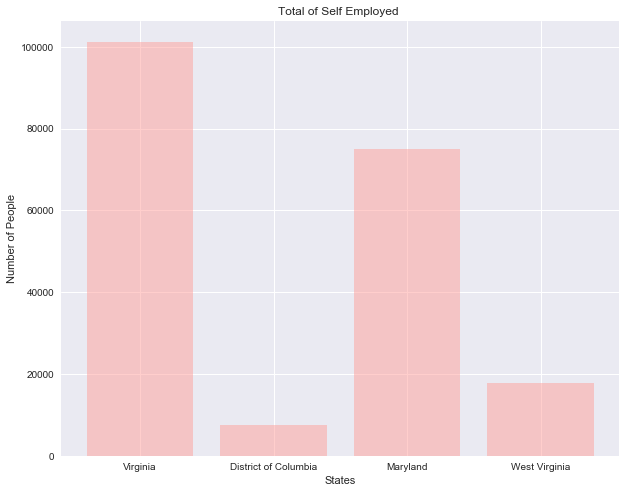

In [15]:
# Amanda's graphs

total = [101265, 7452, 75034, 17755]
x_axis = np.arange(len(total))
plt.bar(x_axis, total, color='r', alpha=0.5, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["Virginia", "District of Columbia", "Maryland", "West Virginia"])

# Give our chart some labels and a tile
plt.title("Total of Self Employed ")
plt.xlabel("States")
plt.ylabel("Number of People")

plt.show()

In [14]:
# Spencer's data

def GetMajorData(year, gender, age, total, eng, other_eng, bus, ed, other):
# This function gets census data for majors by age and gender.
    
    # Make connection with Census
    response = Census(api_key)
    
    # Do the API call
    census_data = response.acs5.get(('NAME', total, eng, other_eng, bus, ed, other), {'for': 'us:*'})

    # Convert to DataFrame
    census_data = pd.DataFrame(census_data)

    # Column Reordering
    census_data = census_data.rename(columns={"NAME": "Name", total: "Total",eng: "Eng", 
                                              other_eng: "Other Eng", bus: "Bus", ed: "Ed",
                                              other: "Other"})

    # Rename columns
    census_data = census_data[["Name", "Total", "Eng", "Other Eng", "Bus", "Ed", "Other"]]
    
    # Create new columns
    census_data["Total Eng"] = census_data["Eng"] + census_data["Other Eng"]
    census_data["% Eng"] = round(census_data["Total Eng"] / census_data["Total"] * 100, 1)
    census_data["% Bus"] = round(census_data["Bus"] / census_data["Total"] * 100, 1)
    census_data["% Ed"] = round(census_data["Ed"] / census_data["Total"] * 100, 1)
    census_data["% Other"] = round(census_data["Other"] / census_data["Total"] * 100, 1)
    census_data["Name"] = gender + " " + age
    
    #Return final dataframe
    return (census_data)

In [3]:
# Get data for males & females, age groups 25-39, 40-64 and 65+
M2539_census_data = GetMajorData(2016, "Male", "25-39", 'B15011_003E', 'B15011_004E', 'B15011_005E', 'B15011_006E', 
                                       'B15011_007E', 'B15011_008E')
M4064_census_data = GetMajorData(2016, "Male", "40-64", 'B15011_009E', 'B15011_010E', 'B15011_011E', 'B15011_012E', 
                                       'B15011_013E', 'B15011_014E')
M65_census_data = GetMajorData(2016, "Male", "65+", 'B15011_015E', 'B15011_016E', 'B15011_017E', 'B15011_018E', 
                                       'B15011_019E', 'B15011_020E')
F2539_census_data = GetMajorData(2016, "Female", "25-39", 'B15011_022E', 'B15011_023E', 'B15011_024E', 'B15011_025E', 
                                       'B15011_026E', 'B15011_027E')
F4064_census_data = GetMajorData(2016, "Female", "40-64", 'B15011_028E', 'B15011_029E', 'B15011_030E', 'B15011_031E', 
                                       'B15011_032E', 'B15011_033E')
F65_census_data = GetMajorData(2016, "Female", "65+", 'B15011_034E', 'B15011_035E', 'B15011_036E', 'B15011_037E', 
                                       'B15011_038E', 'B15011_039E')

# Combine all dataframes together
combined_df = M2539_census_data.append(M4064_census_data, ignore_index=True)
combined_df = combined_df.append(M65_census_data, ignore_index=True)
combined_df = combined_df.append(F2539_census_data, ignore_index=True)
combined_df = combined_df.append(F4064_census_data, ignore_index=True)
combined_df = combined_df.append(F65_census_data, ignore_index=True)
combined_df

,Name,Total,Eng,Other Eng,Bus,Ed,Other,Total Eng,% Eng,% Bus,% Ed,% Other
0,Male 25-39,9626485.0,4247668.0,514041.0,2198814.0,381198.0,2284764.0,4761709.0,49.5,22.8,4.0,23.7
1,Male 40-64,15187133.0,6615673.0,884947.0,3821869.0,899547.0,2965097.0,7500620.0,49.4,25.2,5.9,19.5
2,Male 65+,6250906.0,2742613.0,331770.0,1393268.0,720399.0,1062856.0,3074383.0,49.2,22.3,11.5,17.0
3,Female 25-39,11908897.0,3748414.0,1384061.0,2130571.0,1427004.0,3218847.0,5132475.0,43.1,17.9,12.0,27.0
4,Female 40-64,16491728.0,4166904.0,2218959.0,3253751.0,2997847.0,3854267.0,6385863.0,38.7,19.7,18.2,23.4
5,Female 65+,5302638.0,956074.0,655498.0,434062.0,1977125.0,1279879.0,1611572.0,30.4,8.2,37.3,24.1


In [4]:
# Format columns and reindex on name
combined_df["Total"] = combined_df["Total"].map("{:,.2f}".format)
combined_df["Eng"] = combined_df["Eng"].map("{:,.2f}".format)
combined_df["Other Eng"] = combined_df["Other Eng"].map("{:,.2f}".format)
combined_df["Bus"] = combined_df["Bus"].map("{:,.2f}".format)
combined_df["Ed"] = combined_df["Ed"].map("{:,.2f}".format)
combined_df["Other"] = combined_df["Other"].map("{:,.2f}".format)
combined_df["Total Eng"] = combined_df["Total Eng"].map("{:,.2f}".format)
combined_df.set_index("Name", inplace=True)
combined_df

,Total,Eng,Other Eng,Bus,Ed,Other,Total Eng,% Eng,% Bus,% Ed,% Other
Name,,,,,,,,,,,
Male 25-39,"9,626,485.00","4,247,668.00","514,041.00","2,198,814.00","381,198.00","2,284,764.00","4,761,709.00",49.5,22.8,4.0,23.7
Male 40-64,"15,187,133.00","6,615,673.00","884,947.00","3,821,869.00","899,547.00","2,965,097.00","7,500,620.00",49.4,25.2,5.9,19.5
Male 65+,"6,250,906.00","2,742,613.00","331,770.00","1,393,268.00","720,399.00","1,062,856.00","3,074,383.00",49.2,22.3,11.5,17.0
Female 25-39,"11,908,897.00","3,748,414.00","1,384,061.00","2,130,571.00","1,427,004.00","3,218,847.00","5,132,475.00",43.1,17.9,12.0,27.0
Female 40-64,"16,491,728.00","4,166,904.00","2,218,959.00","3,253,751.00","2,997,847.00","3,854,267.00","6,385,863.00",38.7,19.7,18.2,23.4
Female 65+,"5,302,638.00","956,074.00","655,498.00","434,062.00","1,977,125.00","1,279,879.00","1,611,572.00",30.4,8.2,37.3,24.1


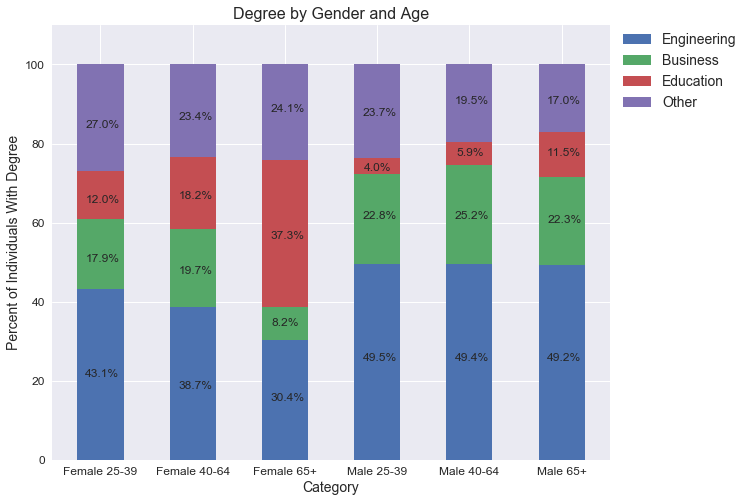

In [5]:
# Spencer's graphs
# This section print a stacked bar chart for each major by gender/age category

# Clear plots
plt.clf()

# Set the width of the bars
width = 0.5 

# Create bar plots for each degree
p1 = plt.bar(combined_df.index, combined_df["% Eng"], width)
p2 = plt.bar(combined_df.index, combined_df["% Bus"], width, bottom=combined_df["% Eng"])
p3 = plt.bar(combined_df.index, combined_df["% Ed"], width, bottom=combined_df["% Eng"]+combined_df["% Bus"])
p4 = plt.bar(combined_df.index, combined_df["% Other"], width, bottom=combined_df["% Eng"]+combined_df["% Bus"]+combined_df["% Ed"])

# Format chart items
plt.ylim(0, 110)
plt.ylabel('Percent of Individuals With Degree', fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.title('Degree by Gender and Age', fontsize=16)
plt.tick_params(labelsize=12)
plt.legend(('Engineering', 'Business', 'Education', 'Other'), bbox_to_anchor=(1.25, 1.01), prop={'size': 14})

# Add labels for values
plt.text(-0.165, 21, f"{combined_df.loc['Female 25-39', '% Eng']}%")
plt.text(-0.165, 50, f"{combined_df.loc['Female 25-39', '% Bus']}%")
plt.text(-0.165, 65, f"{combined_df.loc['Female 25-39', '% Ed']}%")
plt.text(-0.165, 84, f"{combined_df.loc['Female 25-39', '% Other']}%")

plt.text(0.845, 18, f"{combined_df.loc['Female 40-64', '% Eng']}%")
plt.text(0.845, 47, f"{combined_df.loc['Female 40-64', '% Bus']}%")
plt.text(0.845, 66, f"{combined_df.loc['Female 40-64', '% Ed']}%")
plt.text(0.845, 86, f"{combined_df.loc['Female 40-64', '% Other']}%")

plt.text(1.84, 15, f"{combined_df.loc['Female 65+', '% Eng']}%")
plt.text(1.85, 34, f"{combined_df.loc['Female 65+', '% Bus']}%")
plt.text(1.84, 56, f"{combined_df.loc['Female 65+', '% Ed']}%")
plt.text(1.84, 88, f"{combined_df.loc['Female 65+', '% Other']}%")

plt.text(2.84, 25, f"{combined_df.loc['Male 25-39', '% Eng']}%")
plt.text(2.84, 61, f"{combined_df.loc['Male 25-39', '% Bus']}%")
plt.text(2.86, 73, f"{combined_df.loc['Male 25-39', '% Ed']}%")
plt.text(2.84, 87, f"{combined_df.loc['Male 25-39', '% Other']}%")

plt.text(3.84, 25, f"{combined_df.loc['Male 40-64', '% Eng']}%")
plt.text(3.84, 61, f"{combined_df.loc['Male 40-64', '% Bus']}%")
plt.text(3.86, 77, f"{combined_df.loc['Male 40-64', '% Ed']}%")
plt.text(3.84, 90, f"{combined_df.loc['Male 40-64', '% Other']}%")

plt.text(4.84, 25, f"{combined_df.loc['Male 65+', '% Eng']}%")
plt.text(4.85, 60, f"{combined_df.loc['Male 65+', '% Bus']}%")
plt.text(4.84, 77, f"{combined_df.loc['Male 65+', '% Ed']}%")
plt.text(4.84, 90, f"{combined_df.loc['Male 65+', '% Other']}%")

# Save the figure
plt.savefig("DegreeBreakdown.png")

# Display chart
plt.show()

In [6]:
def GetEngineerData(gender, year, census_total, census_eng, census_other_eng):
# This function gets census data for just engineering degrees

    # Make connection with Census
    response = Census(api_key, year=year)

    # Do the API call
    census_data = response.acs5.get(('NAME', census_total, census_eng, census_other_eng), {'for': 'us:*'})

    # Convert to DataFrame
    census_data = pd.DataFrame(census_data)

    # Rename columns
    census_data = census_data.rename(columns={"NAME": "Name", census_total: "Total", 
                                              census_eng: "Eng", census_other_eng: "Other Eng"})

    # Reorder columns
    census_data = census_data[["Name", "Total", "Eng", "Other Eng"]]
    census_data["Total Eng"] = census_data["Eng"] + census_data["Other Eng"]
    census_data["% Eng"] = round(census_data["Total Eng"] / census_data["Total"] * 100, 1)
    census_data["Name"] = gender + " 25-39 " + str(year)
    
    # Return final dataframe
    return(census_data)

In [7]:
# Census codes for engineering degrees for males 25-39
m_2539_total = 'B15011_003E'
m_2539_eng = 'B15011_004E'
m_2539_other = 'B15011_005E'

M2013_census_data = GetEngineerData("Male", 2013, m_2539_total, m_2539_eng, m_2539_other)
M2014_census_data = GetEngineerData("Male", 2014, m_2539_total, m_2539_eng, m_2539_other)
M2015_census_data = GetEngineerData("Male", 2015, m_2539_total, m_2539_eng, m_2539_other)
M2016_census_data = GetEngineerData("Male", 2016, m_2539_total, m_2539_eng, m_2539_other)

# Combine dataframes and reindex
male_combined_df = M2013_census_data.append(M2014_census_data, ignore_index=True)
male_combined_df = male_combined_df.append(M2015_census_data, ignore_index=True)
male_combined_df = male_combined_df.append(M2016_census_data, ignore_index=True)
male_combined_df.set_index("Name", inplace=True)
male_combined_df

,Total,Eng,Other Eng,Total Eng,% Eng
Name,,,,,
Male 25-39 2013,8867045.0,3910592.0,464932.0,4375524.0,49.3
Male 25-39 2014,9059703.0,3986449.0,480278.0,4466727.0,49.3
Male 25-39 2015,9336099.0,4105456.0,495166.0,4600622.0,49.3
Male 25-39 2016,9626485.0,4247668.0,514041.0,4761709.0,49.5


In [8]:
# Census codes for engineering degrees for females 25-39
f_2539_total = 'B15011_022E'
f_2539_eng = 'B15011_023E'
f_2539_other = 'B15011_024E'

F2013_census_data = GetEngineerData("Female", 2013, f_2539_total, f_2539_eng, f_2539_other)
F2014_census_data = GetEngineerData("Female", 2014, f_2539_total, f_2539_eng, f_2539_other)
F2015_census_data = GetEngineerData("Female", 2015, f_2539_total, f_2539_eng, f_2539_other)
F2016_census_data = GetEngineerData("Female", 2016, f_2539_total, f_2539_eng, f_2539_other)

# Combine dataframes and reindex
female_combined_df = F2013_census_data.append(F2014_census_data, ignore_index=True)
female_combined_df = female_combined_df.append(F2015_census_data, ignore_index=True)
female_combined_df = female_combined_df.append(F2016_census_data, ignore_index=True)
female_combined_df.set_index("Name", inplace=True)
female_combined_df

,Total,Eng,Other Eng,Total Eng,% Eng
Name,,,,,
Female 25-39 2013,10976414.0,3443083.0,1197444.0,4640527.0,42.3
Female 25-39 2014,11246878.0,3529045.0,1248125.0,4777170.0,42.5
Female 25-39 2015,11560649.0,3636300.0,1311601.0,4947901.0,42.8
Female 25-39 2016,11908897.0,3748414.0,1384061.0,5132475.0,43.1


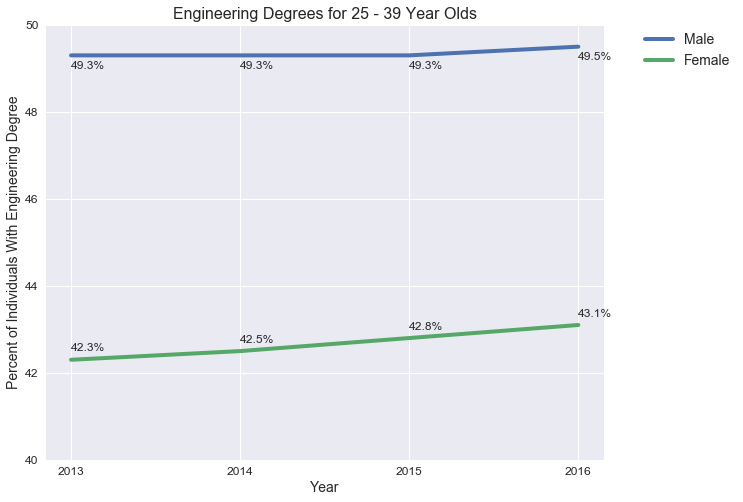

In [20]:
# Clear plots
plt.clf()

# Create plots
plt.plot(["2013","2014","2015","2016"], male_combined_df["% Eng"], linewidth = 4)
plt.plot(["2013","2014","2015","2016"], female_combined_df["% Eng"], linewidth = 4)

# Format plots
plt.ylim(40, 50)
plt.ylabel('Percent of Individuals With Engineering Degree', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Engineering Degrees for 25 - 39 Year Olds', fontsize=16)
plt.tick_params(labelsize=12)
plt.legend(('Male', 'Female'), bbox_to_anchor=(1.25, 1.01), prop={'size': 14})

# Add value labels
plt.text(0, 49, f"{male_combined_df.loc['Male 25-39 2013', '% Eng']}%")
plt.text(1, 49, f"{male_combined_df.loc['Male 25-39 2014', '% Eng']}%")
plt.text(2, 49, f"{male_combined_df.loc['Male 25-39 2015', '% Eng']}%")
plt.text(3, 49.2, f"{male_combined_df.loc['Male 25-39 2016', '% Eng']}%")

plt.text(0, 42.5, f"{female_combined_df.loc['Female 25-39 2013', '% Eng']}%")
plt.text(1, 42.7, f"{female_combined_df.loc['Female 25-39 2014', '% Eng']}%")
plt.text(2, 43, f"{female_combined_df.loc['Female 25-39 2015', '% Eng']}%")
plt.text(3, 43.3, f"{female_combined_df.loc['Female 25-39 2016', '% Eng']}%")

# Save the figure
plt.savefig("EngineeringBreakdown.png")

# Display chart
plt.show()                              

In [10]:
# This section gets engineer majors for males and females ages 25-39 by state

# Establish API connection
response = Census(api_key, year=2016)

# Do the API call
M2539_state_data = response.acs5.get(('NAME', 'B15011_003E', 'B15011_004E', 'B15011_005E'), {'for': 'state:*'})

# Convert to DataFrame
M2539_state_data = pd.DataFrame(M2539_state_data)

# Rename columns
M2539_state_data = M2539_state_data.rename(columns={"NAME": "Name", 'B15011_003E': "Total", 
                                          'B15011_004E': "Eng", 'B15011_005E': "Other Eng"})

# Reorder columns
M2539_state_data = M2539_state_data[["Name", "Total", "Eng", "Other Eng"]]
M2539_state_data["Total Eng"] = M2539_state_data["Eng"] + M2539_state_data["Other Eng"]
M2539_state_data["% Eng"] = round(M2539_state_data["Total Eng"] / M2539_state_data["Total"] * 100, 1)

# Do the API call
F2539_state_data = response.acs5.get(('NAME', 'B15011_022E', 'B15011_023E', 'B15011_024E'), {'for': 'state:*'})

# Convert to DataFrame
F2539_state_data = pd.DataFrame(F2539_state_data)

# Rename columns
F2539_state_data = F2539_state_data.rename(columns={"NAME": "Name", 'B15011_022E': "Total", 
                                          'B15011_023E': "Eng", 'B15011_024E': "Other Eng"})

# Reorder columns
F2539_state_data = F2539_state_data[["Name", "Total", "Eng", "Other Eng"]]
F2539_state_data["Total Eng"] = F2539_state_data["Eng"] + F2539_state_data["Other Eng"]
F2539_state_data["% Eng"] = round(F2539_state_data["Total Eng"] / F2539_state_data["Total"] * 100, 1)

In [11]:
# Merge state level dataframes
state_data = pd.merge(M2539_state_data[["Name", "% Eng"]], F2539_state_data[["Name", "% Eng"]], on="Name")

# Rename columns
state_data = state_data.rename(columns={'% Eng_x': "Male % Eng", '% Eng_y': "Female % Eng"})

state_data["Gap"] = state_data["Male % Eng"] - state_data["Female % Eng"]

# Sort dataframe
state_data = state_data.sort_values("Gap", ascending=False)

# Calculate the states with the largest and smallest difference between males and females
max_gap = state_data.iloc[0,:]
min_gap = state_data.iloc[state_data.shape[0]-1,:]

# Sort dataframe
state_data = state_data.sort_values("Male % Eng", ascending=False)

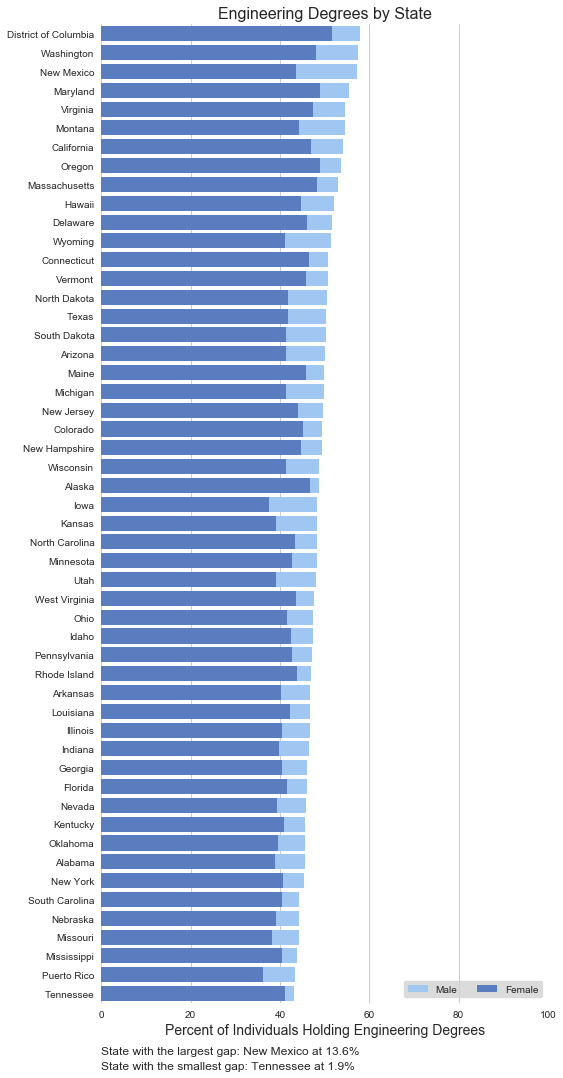

In [28]:
# Set seaborn style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 18))

# Plot the % of male engineers by state
sns.set_color_codes("pastel")
sns.barplot(x=state_data["Male % Eng"], y=state_data["Name"], data=state_data, label="Male", color="b")

# Plot the % of female engineers by state
sns.set_color_codes("muted")
sns.barplot(x=state_data["Female % Eng"], y=state_data["Name"], data=state_data, label="Female", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True, facecolor='lightgray')
ax.set(xlim=(0, 100), ylabel="")
ax.set_xlabel("Percent of Individuals Holding Engineering Degrees", fontdict={'fontsize' : 14})
plt.title('Engineering Degrees by State', fontsize=16)
sns.despine(left=True, bottom=True)

# Display states with largest and smallest gaps
plt.text(0, 54.2, f"State with the largest gap: {max_gap['Name']} at {max_gap['Gap']:,.1f}%")
plt.text(0, 55, f"State with the smallest gap: {min_gap['Name']} at {min_gap['Gap']:,.1f}%")

# Show chart
plt.show()